<a href="https://colab.research.google.com/github/shamim237/Transfer-Learning-in-Keras/blob/main/densenet_tl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import os
import cv2
from PIL import Image
import torch
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import tensorflow as tf
from keras.models import Model, load_model, Sequential

from tensorflow.keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Input, Add, Dense,GlobalAvgPool2D, Concatenate, AvgPool2D, Dropout, ReLU, Activation, MaxPool2D, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, GlobalAveragePooling2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from tensorflow.keras.optimizers import RMSprop, Adam, SGD


In [ ]:
from google.colab import drive 
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
img_dir = '/content/drive/MyDrive/resize data/train/'

In [ ]:
size = 224
dataset = []
label = []

In [ ]:
X_train = np.load("/content/drive/MyDrive/X_train.npy")
y_train = np.load("/content/drive/MyDrive/y_train.npy")

X_test = np.load("/content/drive/MyDrive/X_test.npy")
y_test = np.load("/content/drive/MyDrive/y_test.npy")

In [ ]:
#exu_images = os.listdir(img_dir + 'exudates/')
#for i, image_name in enumerate(exu_images):
 # if(image_name.split('.') [1] == 'jpg'):
    #image = cv2.imread(img_dir + 'exudates/' + image_name)
    #image = Image.fromarray(image, 'RGB') 
    #image = image.resize((size, size))
    #dataset.append(np.array(image))
    #label.append(0)


In [ ]:
#norm_images = os.listdir(img_dir + 'normal/')
#for i, image_name in enumerate(norm_images):
  #if(image_name.split('.') [1] == 'jpg'):
    #image = cv2.imread(img_dir + 'normal/' + image_name)
    #image = Image.fromarray(image, 'RGB') 
    #image = image.resize((size, size))
    #dataset.append(np.array(image))
    #label.append(1)

In [ ]:
dataset = np.array(dataset)
label = np.array(label)

In [ ]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

In [ ]:
#X_train, y_test, X_test, y_test = train_test_split(dataset, label, test_size = 0.20, random_state = 0)

In [ ]:
#from keras.utils import normalize

#X_train = normalize(X_train, axis = 1)
#X_test = normalize(X_test, axis = 1)

In [ ]:
#np.save("/content/drive/MyDrive/X_test.npy", X_test)
#np.save("/content/drive/MyDrive/y_test.npy", y_test)

In [ ]:
input_shape = (size, size, 3)

In [ ]:
model_d= tf.keras.applications.densenet.DenseNet121()

33193984/33188688 [==============================] - 0s 0us/step


In [ ]:
x= model_d.layers[-3].output
x= GlobalAveragePooling2D()(x)
x= BatchNormalization()(x)
x= Dropout(0.5)(x)
x= Dense(1024,activation='relu')(x) 
x= Dense(512,activation='relu')(x) 
x= Dense(64,activation='relu')(x) 
#x= BatchNormalization()(x)
#x= Dropout(0.5)(x)

predictions= Dense(1, activation = 'sigmoid')(x)
model= Model(inputs= model_d.input, outputs= predictions)

In [ ]:
for layer in model.layers[:-20]:
    layer.trainable = False


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
model.compile(optimizer= Adam(lr= 0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history= model.fit(X_train, y_train, 
                   #steps_per_epoch= 250, 
                   validation_data= (X_test, y_test), 
                   verbose = 1, 
                   epochs = 60, 
                   batch_size = 64)

Epoch 1/60
125/125 [==============================] - 69s 233ms/step - loss: 0.4730 - accuracy: 0.7395 - val_loss: 0.3244 - val_accuracy: 0.8605
Epoch 2/60
125/125 [==============================] - 26s 210ms/step - loss: 0.2364 - accuracy: 0.8986 - val_loss: 0.1681 - val_accuracy: 0.9381
Epoch 3/60
125/125 [==============================] - 27s 217ms/step - loss: 0.1389 - accuracy: 0.9438 - val_loss: 0.1410 - val_accuracy: 0.9451
Epoch 4/60
125/125 [==============================] - 27s 215ms/step - loss: 0.0953 - accuracy: 0.9638 - val_loss: 0.1072 - val_accuracy: 0.9557
Epoch 5/60
125/125 [==============================] - 27s 212ms/step - loss: 0.0722 - accuracy: 0.9724 - val_loss: 0.0474 - val_accuracy: 0.9824
Epoch 6/60
125/125 [==============================] - 27s 215ms/step - loss: 0.0530 - accuracy: 0.9818 - val_loss: 0.0593 - val_accuracy: 0.9804
Epoch 7/60
125/125 [==============================] - 27s 215ms/step - loss: 0.0350 - accuracy: 0.9882 - val_loss: 0.0372 - val_ac

In [ ]:
model.save('fundus-array.h5')

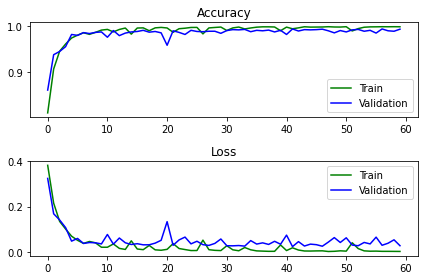


train_accuracy :  [0.8105793595314026, 0.9068009853363037, 0.945591926574707, 0.9614609479904175, 0.9745591878890991, 0.9808564186096191, 0.986146092414856, 0.9826196432113647, 0.9870277047157288, 0.9919395446777344, 0.9934508800506592, 0.988035261631012, 0.9933249354362488, 0.9964735507965088, 0.9831234216690063, 0.9964735507965088, 0.99685138463974, 0.99055415391922, 0.99685138463974, 0.9978589415550232, 0.9965994954109192, 0.9871536493301392, 0.994962215423584, 0.9960957169532776, 0.9977329969406128, 0.9978589415550232, 0.983627200126648, 0.9967254400253296, 0.9977329969406128, 0.9986146092414856, 0.9910579323768616, 0.9967254400253296, 0.9986146092414856, 0.9944584369659424, 0.9965994954109192, 0.9983627200126648, 0.9991183876991272, 0.9991183876991272, 0.998740553855896, 0.99055415391922, 0.9984886646270752, 0.9948362708091736, 0.99685138463974, 0.9992443323135376, 0.9984886646270752, 0.9986146092414856, 0.998740553855896, 0.999370276927948, 0.998740553855896, 0.9986146092414856,

In [ ]:
#matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
# plot loss and accuracy
plt.subplot(211)
plt.title("Accuracy")
plt.plot(history.history["accuracy"], color="g", label="Train")
plt.plot(history.history["val_accuracy"], color="b", label="Validation")
plt.legend(loc="best")

plt.subplot(212)
plt.title("Loss")
plt.plot(history.history["loss"], color="g", label="Train")
plt.plot(history.history["val_loss"], color="b", label="Validation")
plt.legend(loc="best")

plt.tight_layout()
plt.show()

print()
train_accuracy = history.history["accuracy"]
valid_accuracy = history.history["val_accuracy"]

train_err = history.history["loss"]
valid_err = history.history["val_loss"]


print("train_accuracy : ", train_accuracy)
print("valid_accuracy : ", valid_accuracy)
print("train_err : ", train_err)
print("valid_err : ", valid_err)

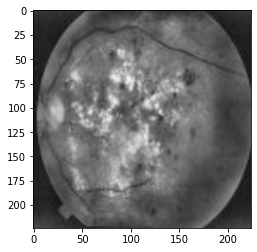

In [ ]:
n = 30
img = X_test[n]
plt.imshow(img)

In [ ]:
input_img = np.expand_dims(img, axis = 0)
print("The prediction for this image is: ", model.predict(input_img))
print("The actual label for this image is: ", y_test[n])

The prediction for this image is:  [[6.4733917e-12]]
The actual label for this image is:  0


In [ ]:
_, acc = model.evaluate(X_test, y_test)
print('Accuracy = ', (acc * 100.0), '100%')

63/63 [==============================] - 7s 85ms/step - loss: 0.0272 - accuracy: 0.9940
Accuracy =  99.39576983451843 100%


In [ ]:
mythreshold  = 0.5
from sklearn.metrics import confusion_matrix
y_pred = (model.predict(X_test)>= mythreshold).astype(int)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[975   3]
 [  9 999]]


In [ ]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
      for j in range (cm.shape[1]):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[975   3]
 [  9 999]]


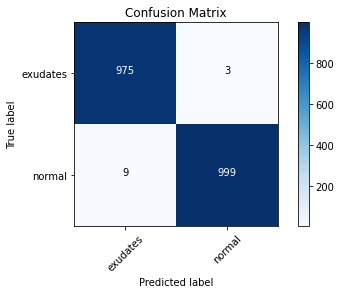

In [ ]:
cm_plot_labels = ['exudates', 'normal']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')